## Imports

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [88]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv"
data = pd.read_csv(url)
data.head(5)

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [89]:
X = data[["mp"]]
y = data["win_rating"]

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

<AxesSubplot:xlabel='mp', ylabel='win_rating'>

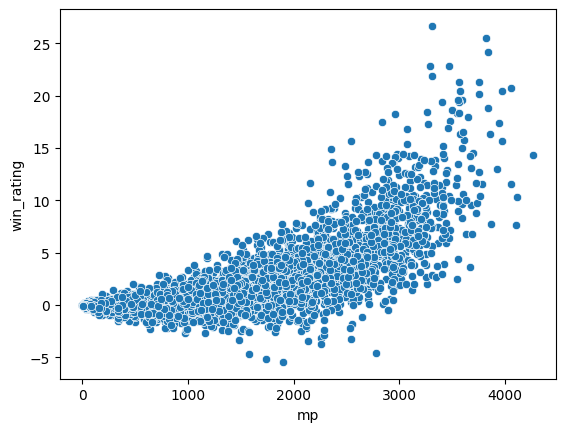

In [90]:
sns.scatterplot(data=data, x="mp", y="win_rating")

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [91]:
model = LinearRegression()

In [92]:
cv_results = cross_validate(estimator=model, X=X, y=y)
cv_results

{'fit_time': array([0.00885367, 0.00443459, 0.00398374, 0.00461793, 0.0049696 ]),
 'score_time': array([0.00371718, 0.00384688, 0.00514007, 0.00319028, 0.0030582 ]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [93]:
min_score = cv_results["test_score"].min()
min_score

0.5344790822272503

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [94]:
max_score = cv_results["test_score"].max()
max_score

0.5791776193355004

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [95]:
mean_score = cv_results["test_score"].mean()
mean_score

0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [96]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.21s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [97]:
import numpy as np

total_times = []
mean_scores = []
stop_value = 21
for k in range(2,stop_value):
    cv_results = cross_validate(estimator=model, X=X, y=y, cv=k)
    total_times.append(cv_results["fit_time"].sum() + cv_results["score_time"].sum())
    mean_scores.append(cv_results["test_score"].mean())


print("mean", mean_scores)
print("total time", total_times)


mean [0.5585953456775263, 0.5586660529802963, 0.5593666259668205, 0.556730180006891, 0.5585239978698054, 0.5591598213023138, 0.5592067633158935, 0.5587039079067392, 0.5568678806855818, 0.5574423923917567, 0.5597840270097336, 0.5592188591410787, 0.560203926449041, 0.558316628931251, 0.55920902727961, 0.5594257624294945, 0.559576056746282, 0.556773505469385, 0.5573895158123787]
total time [0.018552303314208984, 0.025813817977905273, 0.033078670501708984, 0.04890275001525879, 0.047258615493774414, 0.05197024345397949, 0.04791402816772461, 0.047684669494628906, 0.05677318572998047, 0.06102490425109863, 0.06027507781982422, 0.07049345970153809, 0.09106326103210449, 0.09904932975769043, 0.10796904563903809, 0.08591008186340332, 0.09624552726745605, 0.13397979736328125, 0.14855241775512695]


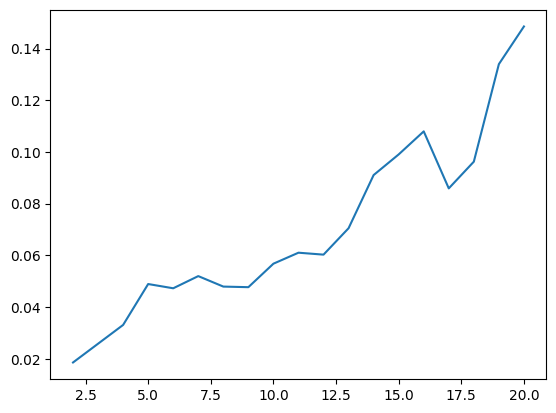

In [98]:
plt.plot(range(2,stop_value), total_times)

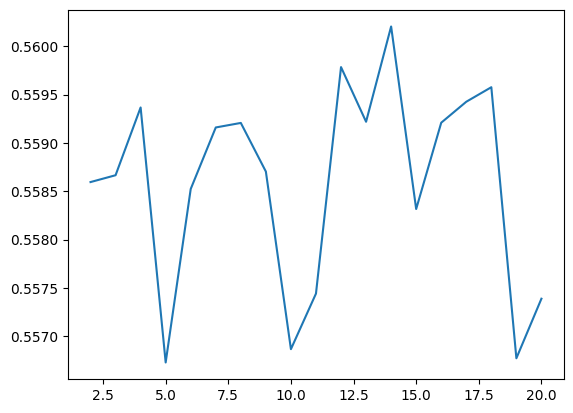

In [99]:
plt.plot(range(2,stop_value), mean_scores)

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

In [100]:
import numpy as np

total_times = []
mean_scores = []
stop_value = 100
for k in range(2,stop_value):
    cv_results = cross_validate(estimator=model, X=X, y=y, cv=k)
    total_times.append(cv_results["fit_time"].sum() + cv_results["score_time"].sum())
    mean_scores.append(cv_results["test_score"].mean())


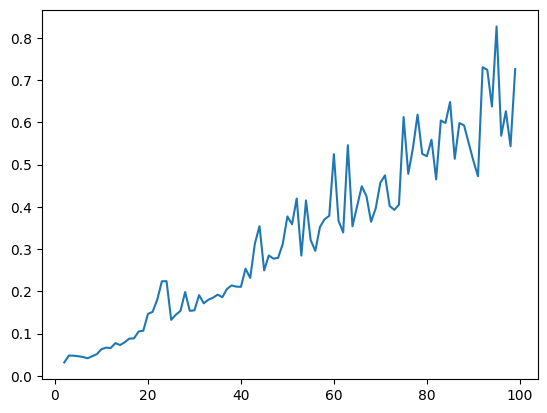

In [101]:
plt.plot(range(2,stop_value), total_times)

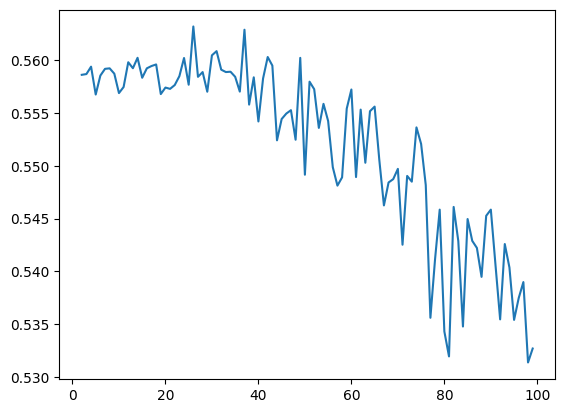

In [102]:
plt.plot(range(2,stop_value), mean_scores)

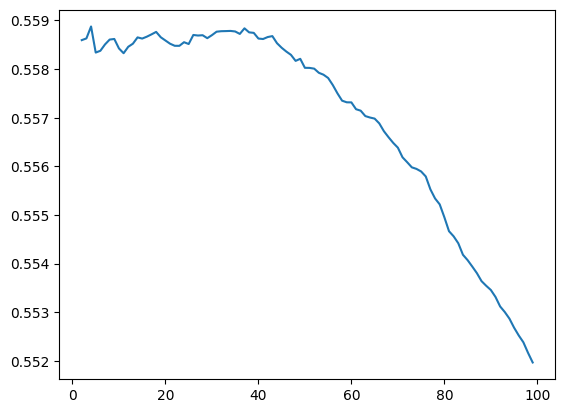

In [103]:
import pandas as pd
cumulative_means = pd.Series(mean_scores).expanding().mean()
cumulative_means
plt.plot(range(2,stop_value), cumulative_means)

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [104]:
model = LinearRegression()
model = model.fit(X, y)
model

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [105]:
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [106]:
intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [107]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [119]:
X_new=[[1000]] # Lazy version -- this works, but prodoces because the model was trained on named columns of a df and the prediction based on a 2D list
# Better to create a df with the new feature values!
prediction = model.predict(X_new)
print(prediction)

[1.056205]


/home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ☑️ Test your code

In [112]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.20s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [113]:
data.columns

Index(['season', 'poss', 'mp', 'do_ratio', 'pacing', 'win_rating'], dtype='object')

In [114]:
data[["win_rating","poss", "do_ratio", "pacing"]].corr()

,win_rating,poss,do_ratio,pacing
win_rating,1.000000,0.742017,0.666120,-0.202611
poss,0.742017,1.000000,0.587754,-0.301149
do_ratio,0.666120,0.587754,1.000000,-0.169967
pacing,-0.202611,-0.301149,-0.169967,1.000000


<AxesSubplot:>

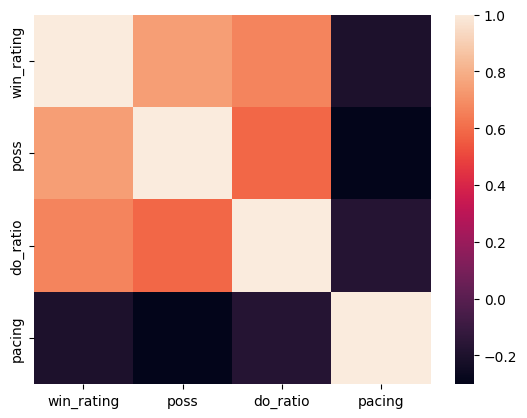

In [115]:
sns.heatmap(data[["win_rating","poss", "do_ratio", "pacing"]].corr())

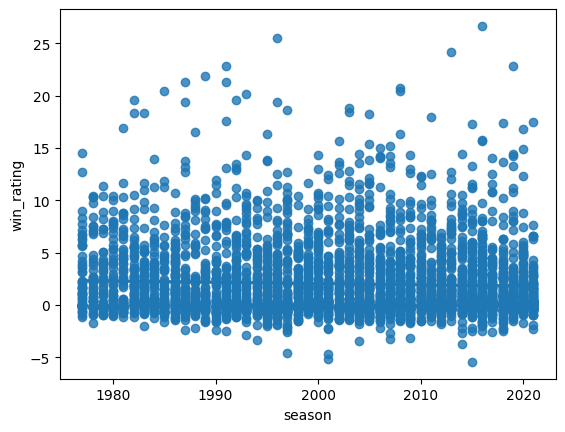

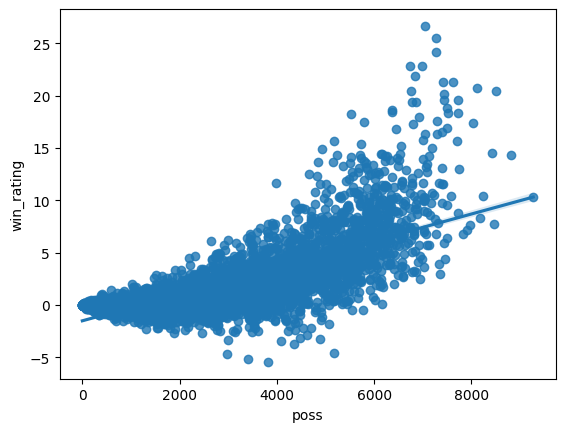

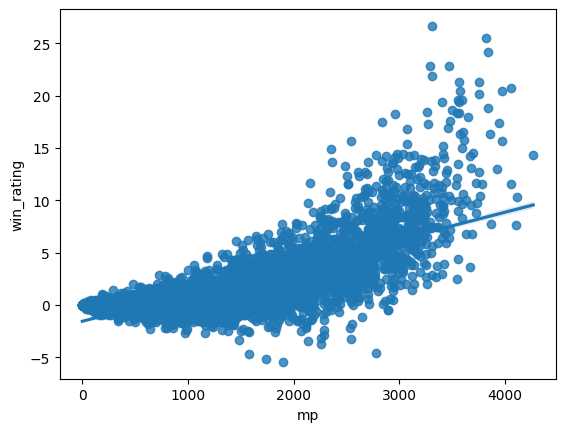

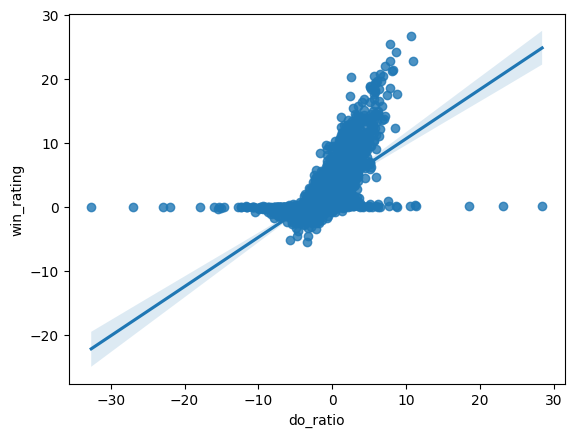

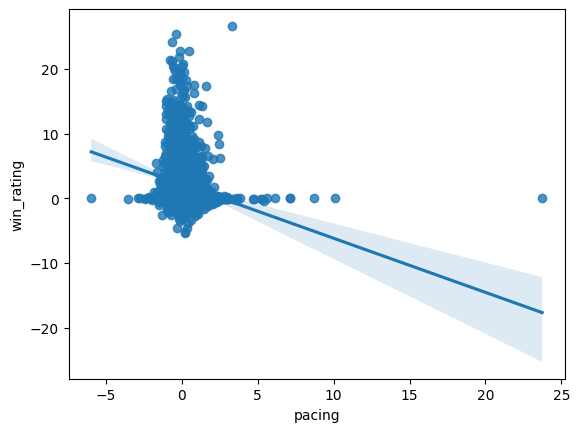

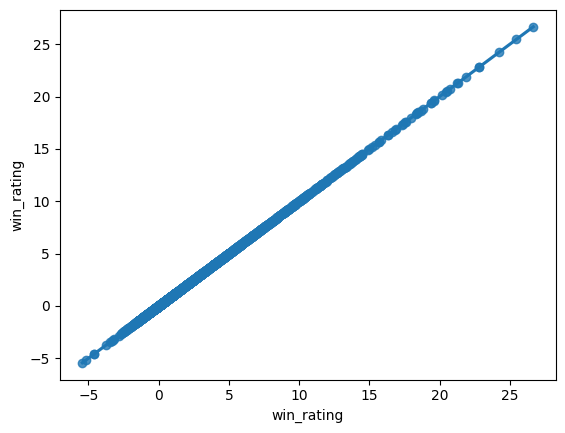

In [121]:
for col in data.columns:
    sns.regplot(data=data, y="win_rating", x=col)
    plt.show()

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [143]:
y = data["win_rating"]
X_multi = data[["mp", "do_ratio"]]

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [144]:
model_multi = LinearRegression()
mean_2_feat_score = cross_val_score(estimator=model_multi, X=X_multi, y=y).mean()
mean_2_feat_score

0.6317728310765246

### ☑️ Test your code

In [145]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁

In [153]:
# Could poss be binomial?
y = data["win_rating"]
X_binomial = data[["mp", "do_ratio", "poss"]]
X_binomial["poss_2"] = X_binomial["poss"]**2
model_binomial = LinearRegression()
binomial_score = cross_val_score(estimator=model_binomial, X=X_binomial, y=y).mean()
binomial_score

/tmp/ipykernel_37044/3470295034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_binomial["poss_2"] = X_binomial["poss"]**2


0.7361532355720497